In [92]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings  # warning filter
import matplotlib.pyplot as plt # Data visulization
import seaborn as sns # Data visulization
%matplotlib inline

In [93]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [29]:
from sklearn.model_selection import cross_val_score as CVS

In [30]:
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [31]:
train_path = "D:\Technocolab project\BigMart\Train.csv"
#path for the testing set
test_path = "D:\Technocolab project\BigMart\Test.csv"

In [32]:
train = pd.read_csv(train_path)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
test = pd.read_csv(test_path)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [34]:
print(f'Training Dataset (row, col): {train.shape} \n\nTesting Dataset (row, col): {test.shape}')

Training Dataset (row, col): (8523, 12) 

Testing Dataset (row, col): (5681, 11)


In [35]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 13)


In [36]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [37]:
data.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDX26,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


In [38]:
print('Train:\n')
print('Missing Values by Count: \n\n',
      data.isnull().sum().sort_values(ascending=False),'\n\nMissing Values by %:\n\n',
      data.isnull().sum().sort_values(ascending=False)/data.shape[0] * 100)

Train:

Missing Values by Count: 

 Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64 

Missing Values by %:

 Item_Outlet_Sales            39.995776
Outlet_Size                  28.273726
Item_Weight                  17.171219
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
source          

In [39]:
print('Missing Values in Outlet_Size :\n\n',data.Outlet_Size.value_counts())
print('\nMissing Values in Item_Weight :\n\n',data.Item_Weight.value_counts())

Missing Values in Outlet_Size :

 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Missing Values in Item_Weight :

 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.275       7
8.770       7
4.615       6
7.850       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


In [40]:
print('Missing Values in Item_Weight: ', len(data[data.Outlet_Size.isnull()]))
miss_values = data.Outlet_Size.isnull()
O_Size_avg = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values, 'Outlet_Type'].apply(lambda x:O_Size_avg.loc[x])
print('Missing values after filling: ' , sum(data['Outlet_Size'].isnull()))

Missing Values in Item_Weight:  4016
Missing values after filling:  0


Text(0.5, 1.0, 'Item Wieght Distribution')

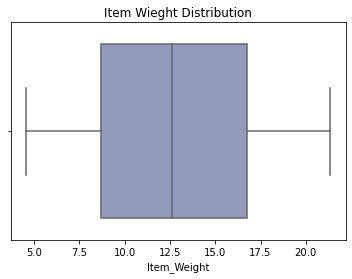

In [41]:
sns.boxplot(x=data['Item_Weight'], palette='BuPu')
plt.title('Item Wieght Distribution')

In [42]:
print('Missing Values in Item_Weight: ', len(data[data.Item_Weight.isnull()]))
miss_values = data.Item_Weight.isnull()
item_wt_avg = data.pivot_table(values='Item_Weight', index ='Item_Identifier')
data.loc[miss_values, 'Item_Weight'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_wt_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Weight'].isnull()))

Missing Values in Item_Weight:  2439
Missing values after filling:  0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [44]:
num_df = data.select_dtypes('number')

In [45]:
cat_df = data.select_dtypes('object')

In [46]:
for col in cat_df.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency of Categories for varible %s'%col)
        print('\nTotal Categories: ', len(cat_df[col].value_counts()), '\n', cat_df[col].value_counts())
        


Frequency of Categories for varible Item_Fat_Content

Total Categories:  5 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type

Total Categories:  16 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Identifier

Total Categories:  10 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019  

In [47]:
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [48]:
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable']) 
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [49]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [50]:
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.065953,141.004977,1997.830681,2181.288914
std,4.651716,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Text(0.5, 1.0, 'Item Outlet Sales Distribution')

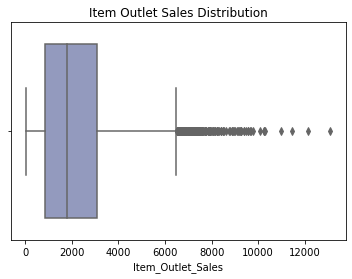

In [51]:
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [52]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

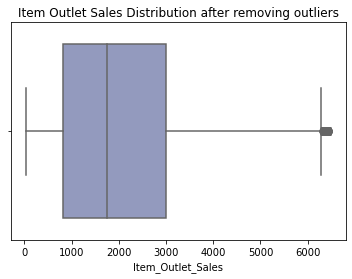

In [53]:
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

In [54]:
data['Oultet_Age'] = 2013 - data['Outlet_Establishment_Year']

In [55]:
print('Missing Values in Item_Visibility: ', len(data[num_df['Item_Visibility'] == 0]))
miss_values = (data['Item_Visibility'] == 0)
item_vis_avg = data.pivot_table(values='Item_Visibility', index ='Item_Identifier')

data.loc[miss_values, 'Item_Visibility'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_vis_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Visibility'].isnull()))

Missing Values in Item_Visibility:  512
Missing values after filling:  0


In [56]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


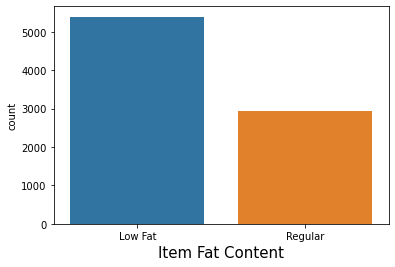

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

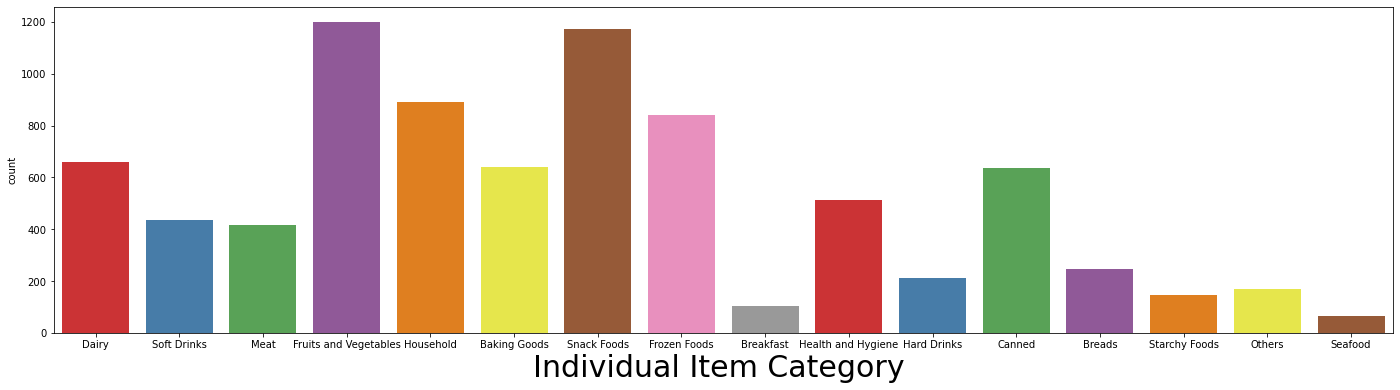

In [58]:
plt.figure(figsize=(24,6))
sns.countplot(data=data, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

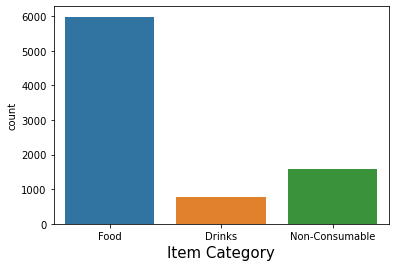

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

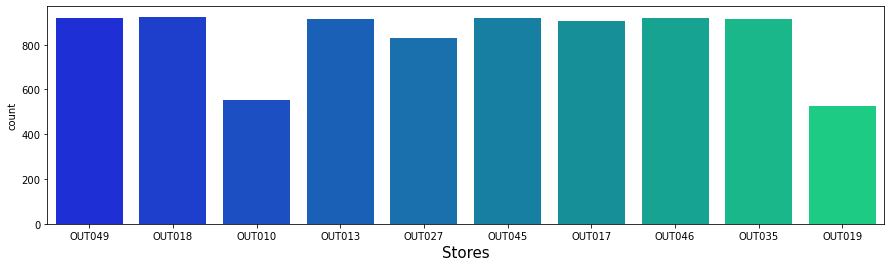

In [60]:
plt.figure(figsize=(15,4))
sns.countplot(data=data, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

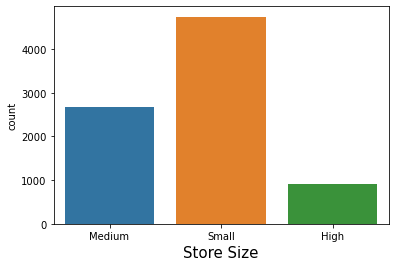

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

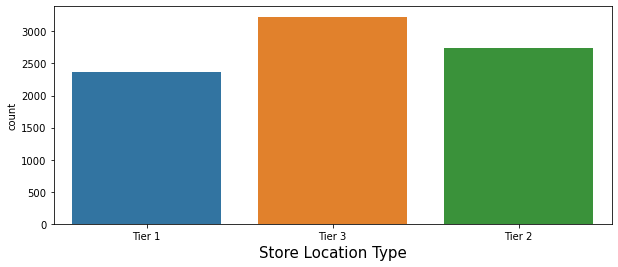

In [62]:
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

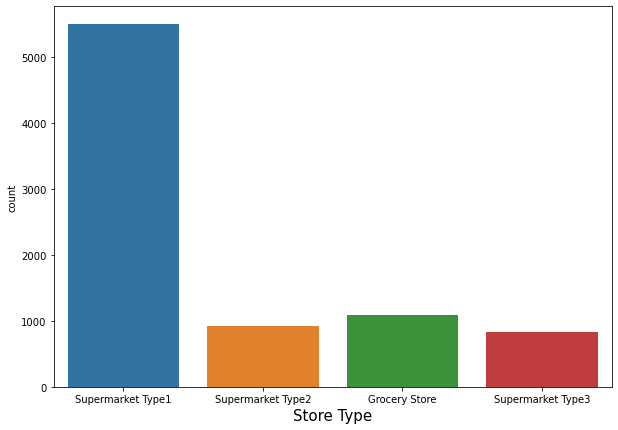

In [63]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

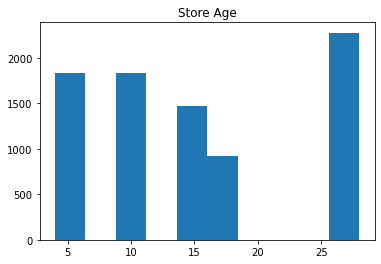

In [64]:
plt.hist(x=data['Oultet_Age'], )
plt.title('Store Age')
plt.show()

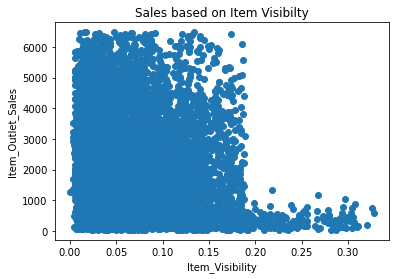

In [65]:
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

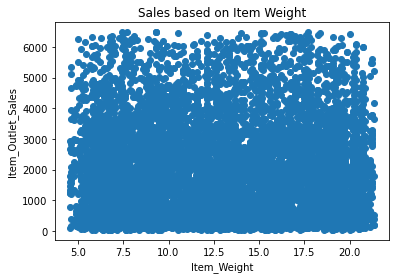

In [66]:
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

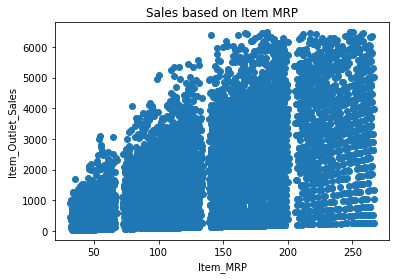

In [67]:
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

No handles with labels found to put in legend.


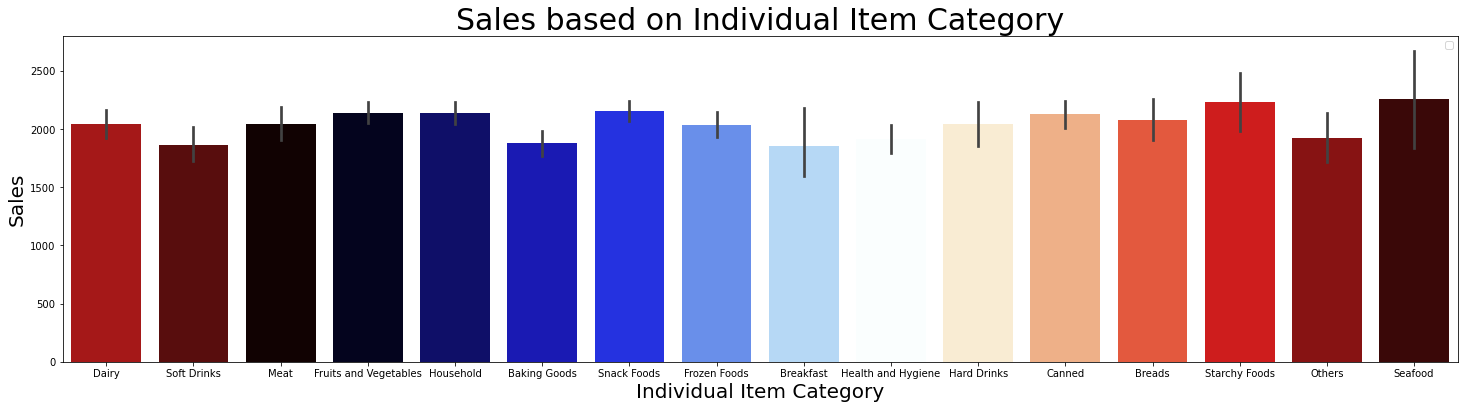

In [68]:
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


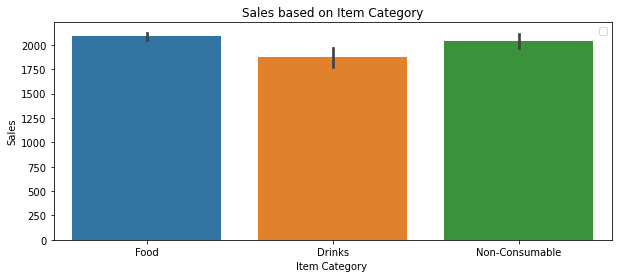

In [69]:
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

No handles with labels found to put in legend.


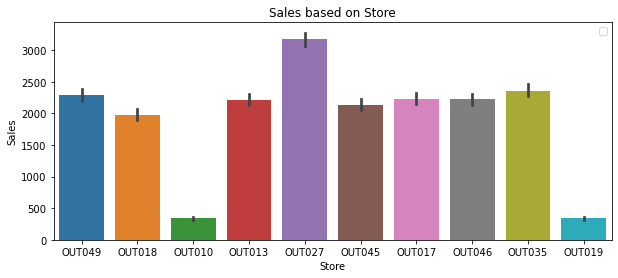

In [70]:
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

No handles with labels found to put in legend.


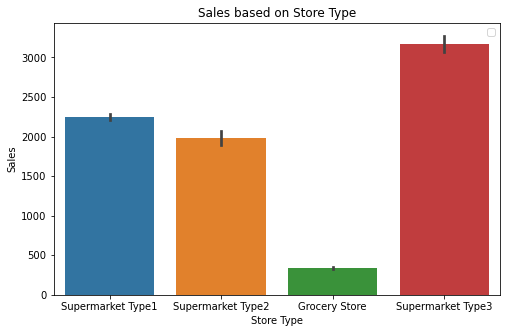

In [71]:
plt.figure(figsize=(8,5))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()


No handles with labels found to put in legend.


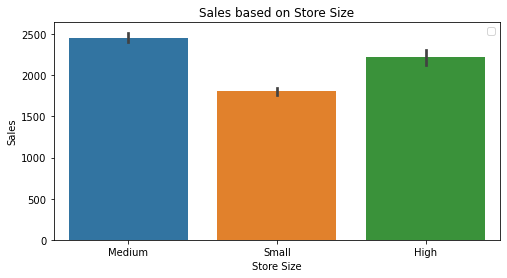

In [72]:
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

No handles with labels found to put in legend.


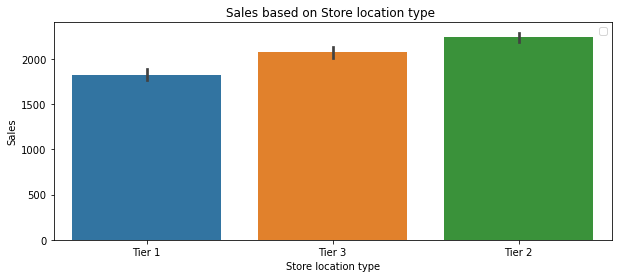

In [73]:
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

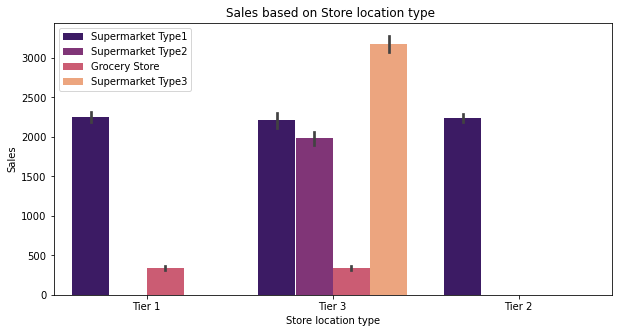

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

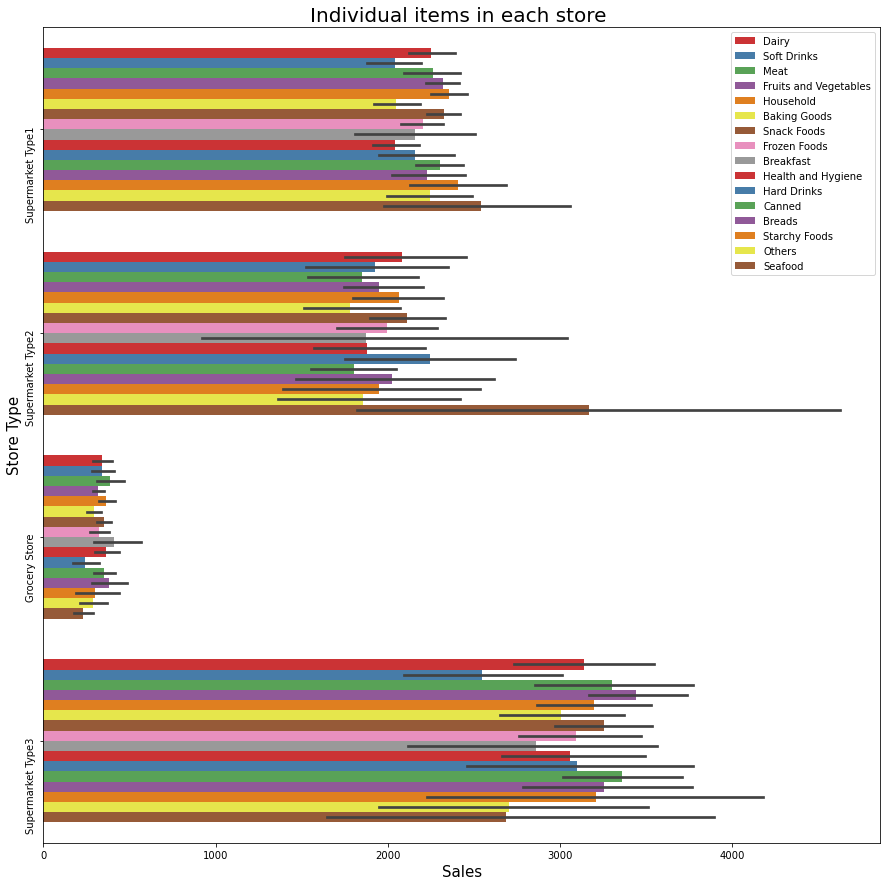

In [75]:
plt.figure(figsize=(15,15))
sns.barplot(data=data,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

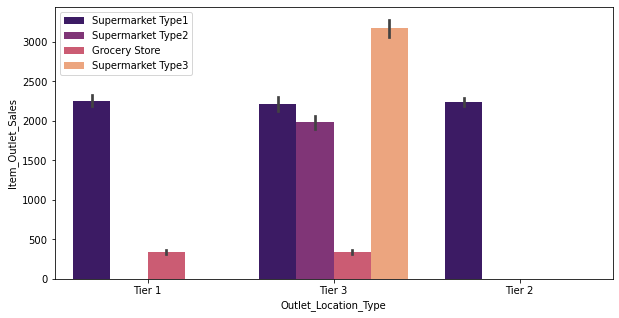

In [76]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.legend()

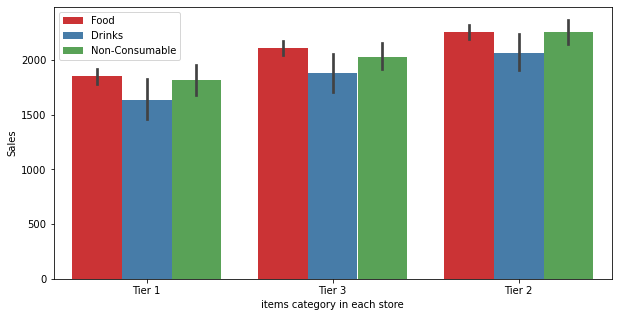

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

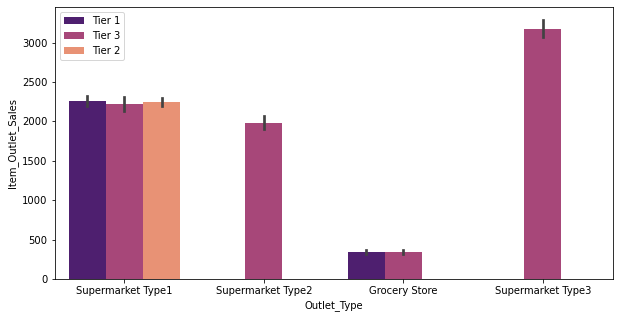

In [78]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type','Item_Outlet_Sales',hue='Outlet_Location_Type',data=data,palette='magma')
plt.legend()

<AxesSubplot:>

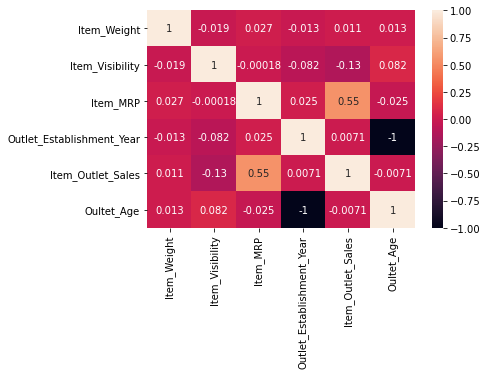

In [79]:
plt.Figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True)

In [80]:
#Label Encoding for Ordinal Data
le = LabelEncoder()
label = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
for i in label:
    data[i] = le.fit_transform(data[i])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26


In [81]:
# One-Hot encoding (OHE) for Nominal Data

# Columns for applying One-Hot encoding
cols = ['Item_Type_Combined']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)
# # # One-hot encoding removed index; put it back
data_oh.index = data.index

# # # Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [82]:
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [83]:
# Drop irrlevent Columns
data_fe = data_fe.drop(['Item_Identifier','Item_Type_Combined', 'Outlet_Identifier','Oultet_Age',
                     'Item_Fat_Content','Item_Visibility', 'Item_Type','Item_Type_Combined',
                     'Outlet_Establishment_Year','Item_Type'], axis=1)
data_fe.head()

# Divide Data into train and test
train = data_fe.loc[data_fe['source']=="train"]
test = data_fe.loc[data_fe['source']=="test"]

train = train.drop('source', axis=1)
test = test.drop(['source',  'Item_Outlet_Sales'], axis=1)
# Check Datasets
print('\nTrain Dataset for Model Buidling: \n')
print(train.info(verbose=True, show_counts=True))
print('\nTest Dataset for Model Buidling: \n')
print(test.info(verbose=True, show_counts=True)) 
train.head()


Train Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8337 non-null   float64
 1   Item_MRP                           8337 non-null   float64
 2   Outlet_Size                        8337 non-null   int32  
 3   Outlet_Location_Type               8337 non-null   int32  
 4   Outlet_Type                        8337 non-null   int32  
 5   Item_Outlet_Sales                  8337 non-null   float64
 6   Item_Type_Combined_Drinks          8337 non-null   int64  
 7   Item_Type_Combined_Food            8337 non-null   int64  
 8   Item_Type_Combined_Non-Consumable  8337 non-null   int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 553.6 KB
None

Test Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,249.8092,1,0,1,3735.1380,0,1,0
1,5.92,48.2692,1,2,2,443.4228,1,0,0
2,17.50,141.6180,1,0,1,2097.2700,0,1,0
3,19.20,182.0950,2,2,0,732.3800,0,1,0
4,8.93,53.8614,0,2,1,994.7052,0,0,1


In [84]:
# Train and Test split
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

In [85]:
# Model
model = LinearRegression(normalize=True)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
LR_MAE = MAE(y_test, y_predict)
LR_MSE = MSE(y_test, y_predict)
LR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LR_MSE)}\n")
print(f" R^2 Score: {LR_R_2}\n")

# Cross Validation Score check
cross_val(LinearRegression(),X,y,5)

TypeError: __init__() got an unexpected keyword argument 'normalize'

In [86]:
# vasulization of model's perfomance
LR_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values()
print(LR_coef)
plt.figure(figsize=(8,5))
sns.barplot(model.coef_,model.feature_names_in_)

NameError: name 'model' is not defined

In [87]:
# Model
model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrics
RFR_MAE = MAE(y_test, y_predict)
RFR_MSE = MSE(y_test, y_predict)
RFR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RandomForestRegressor(),X, y, 5)

 Mean Absolute Error: 718.1273348955266

 Mean Squared Error: 945500.1707830498

 R^2 Score: 0.5744242089133027

RandomForestRegressor() Scores:
0.52
0.5
0.48
0.53
0.53
Average RandomForestRegressor() score: 0.5108


Item_MRP                             0.545500
Outlet_Type                          0.448041
Item_Weight                          0.002964
Outlet_Location_Type                 0.001605
Outlet_Size                          0.001022
Item_Type_Combined_Food              0.000840
Item_Type_Combined_Non-Consumable    0.000027
Item_Type_Combined_Drinks            0.000000
dtype: float64


<AxesSubplot:>

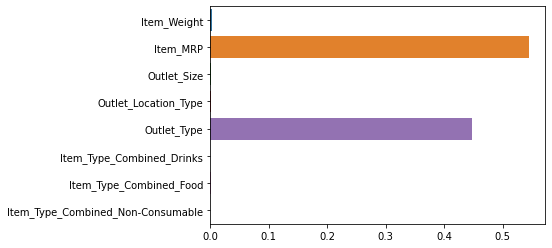

In [88]:
RFR_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(RFR_coef)
sns.barplot(model.feature_importances_, model.feature_names_in_)

In [89]:
# Model
model = XGBRegressor()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrix
XG_MAE = MAE(y_test, y_predict)
XG_MSE = MSE(y_test, y_predict)
XG_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")
print(f" R^2 Score: {XG_R_2}\n")
cross_val(XGBRegressor(),X, y, 5)

 Mean Absolute Error: 761.9328402504542

 Mean Squared Error: 1071171.3149916385

 R^2 Score: 0.5178588075881532

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.54
0.52
0.48
0.53
0.53
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsamp

Outlet_Type                          0.656383
Item_MRP                             0.135247
Item_Type_Combined_Drinks            0.048880
Item_Type_Combined_Non-Consumable    0.034884
Outlet_Size                          0.033279
Item_Type_Combined_Food              0.032013
Outlet_Location_Type                 0.031630
Item_Weight                          0.027684
dtype: float32


<AxesSubplot:>

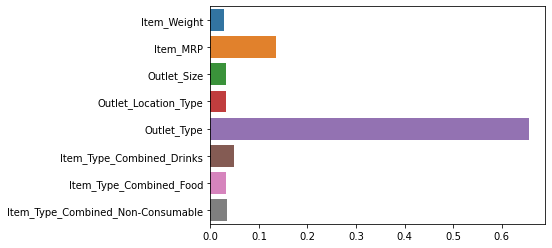

In [90]:
# vasulization of model's perfomance
XG_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(XG_coef)
sns.barplot(model.feature_importances_, model.feature_names_in_)

In [91]:
# Model
model = Ridge(normalize=True)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
R_MAE = MAE(y_test, y_predict)
R_MSE = MSE(y_test, y_predict)
R_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {R_MAE}\n")
print(f" Mean Squared Error: {R_MSE}\n")
print(f" R^2 Score: {R_R_2}\n")

# Cross Validation Score check
cross_val(Lasso(),X,y,5)

TypeError: __init__() got an unexpected keyword argument 'normalize'